<a id='top'></a>

# Homework 2: Introduction to Probability and Simulation
***

**Name**: Joshua Achorn

***

This assignment is due on Canvas by **MIDNIGHT on Friday September 27**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available under the **Data** module on Canvas. To make life easier on the graders if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Remember that there is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do Kernel $\rightarrow$ Restart & Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) | [Problem 4](#p4) | [Problem 5](#p5) 

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

***
<a/ id='p1'></a>
[Back to top](#top)

### [20 points] Problem 1

To play a game, you have a bag containing 30 fair six-sided dice, with faces `{1,2,3,4,5,6}`.  <img style="float: right; width: 200px; padding: 3mm;" src="https://images-na.ssl-images-amazon.com/images/I/619NZnvxJaL._SX425_.jpg" alt="Drawing"/>
This bag also contains 17 fair eight-sided dice (faces `{1,2,3,4,5,6,7,8}`) and 3 fair twenty-sided dice (faces `{1,2,3,4,...,19,20}`).  Call these 3 classes of die "Six", "Eight" and "Twenty" (or S, E, and T, for short). In order to be sure that you are not distinguishing dice by their feel, you are required to wear crab claw gloves. After donning your gloves, you grab one die at random from the bag. 

Work the following problems by hand (or claw) unless otherwise stated (but don't be afraid to simulate to check your result!). 

**Part A**: You roll your die one time.  What is the probability of the event $R_7$, that you roll a 7?  Include at least 4 decimal places in your answer.

30 six die, 17 8die, 3 20 die

P(R_7|6)=0, 

P(R_7|8)=1/8

P(R_7|20)= 1/20

We have 50 dice all together

P(6) = 30/50

P(8) = 17/50

P(20) = 3/50

P(R_7) = P(R_7|6)P(6)+P(R_7|8)P(8)+P(R_7|20)P(20)

= 0(30/50)+1/8(17/50)+1/20(3/50) = 0.0455

**Part B**: Suppose you roll a 7.  What is the probability that the die you chose from the bag is an Eight-sided die? 

The probabily you chose an 8 sided die, after rolling a 7 increases because we can exclude 6 sided die from the probability because it's impossible to roll a 7 with a six sided die. 

Baye's Theorem


$P(E|R_7) = \frac{P(E \cap R_7)}{P(R_7)} = \frac{(P(R_7 \mid E)P(E)} {P(R_7)} = \frac{\frac{1}{8} * \frac{17}{50}}
{P(R_7)}$

 $ = \frac{\frac{1}{8} * \frac{17}{50}}
{0.0455}$ 

= 0.9340



**Part C:**  Are the events $R_7$ and $E$ independent?  Justify your answer **using math**.

if R_7 and E are independent, then we can say that the probability of picking an eight sided die given that we rolled a 7 is the same probability of picking an eight.

We have the answers above already so lets check

$P(E \mid R_7) = P(E) $ ?


$0.9340 \neq 0.34$

As we can see, the two are not equal therefore they are not independant.


**Part D:**  Suppose you roll your die $n$ times and record each outcome.  Obviously, if you roll 7 or 8 you know you did *not* pick a Six-sided die, and if you roll a 9 or higher, you must have picked a Twenty-sided die.

But, if you roll $n$ times in a row and get only 1, 2, 3, 4, 5, or 6 you would have a stronger belief that you in fact grabbed one of the Six-sided dice.  Let $L_n$ be the event that you roll $n$ rolls of 1, 2, 3, 4, 5, or 6 in a row.  For example, one outcome in $L_3$ is the sequence 2, 3, 1.

Given that you roll a single value of 1, 2, 3, 4, 5, or 6, what is the probability that you have grabbed a Six-sided die?  That is, calculate **by hand** $P(S \mid L_1)$.

$L_n$ = 1,2,3,4,5,6

$L_1$ is the sample space of {1,2,3,4,5,6}

P(6) = 30/50 = 3/5

$P(S \mid L_1) = \frac{P(S \cap L_1)}{P(L_1)} = frac{P(L_1 \mid 6)P(6)}{P(L_1)}$

$P(L_1)  =P(L_1 \mid 6)P(6) + P(L_1 \mid 8)P(8) + PL_1 \mid 20)P(20)$

$P(L_1) = 1(3/5)+ 6/8(17/50) 6/20(3/50) = 1.035$

$P(S \mid L_n) =  \frac{3/5}{0.873} = 0.6873$ 

**Part E**:  

First, work out **by hand** a formula for the probability in general that you are rolling a Six-sided die, given that you have rolled $n$ values in a row that are 1, 2, 3, 4, 5 or 6 (that is, $L_n$).  So you want a formula for $P(S \mid L_n)$ in terms of $n$.

Then, define a function `prob_six` to calculate $P(S \mid L_n)$.  This function should only take one positive integer argument, $n$.

Verify that your function is performing as expected by checking your answer to **Part D**.

P(S|Ln) = $\frac{P(L_n \mid 6)P(6)}{P(L_n)}$

$P(L_n) = P(L_n \mid 6)P(6) + P(L_n \mid 8)P(8) + P(L_n \mid 20)P(20) = (\frac{3}{5})^{n} + \frac{6}{8}(\frac{17}{50})^n + \frac{6}{20}(\frac{3}{50})^n$

$P(S \mid L_n) = \frac{(\frac{3}{5})^{n}}{(\frac{3}{5})^{n} + \frac{6}{8}(\frac{17}{50})^n + \frac{6}{20}(\frac{3}{50})^n}$

In [2]:
def prob_six(n):
    return (3/5)**n / ((3/5)**n + (6/8)*(17/50)**n + (6/20)*(3/50)**n)
print(prob_six(1))

0.6872852233676976


**Part F:**  What is the smallest value of $n$ successive rolls of 1, 2, 3, 4, 5 or 6 that would make you believe that there's a better-than-95% chance that the die you grabbed is Six-sided?  Plugging larger and larger values for $n$ into your `prob_six` function is a very reasonable way to check this.

In [3]:
n = 1
while prob_six(n) < 0.96:
    print(n, prob_six(n))
    n+=1


1 0.6872852233676976
2 0.8039662334181964
3 0.8796837048367941
4 0.9281911771303318
5 0.9580143074232785


The lowest value to give us more than 95% chance of grabbing the Six-Sided die would be 5 successive rolls

***
<a id='p2'></a>
[Back to top](#top)


### [20 points] Problem 2

Oscar and Stella are two octopuses who are very excited to have both secured professorships in the Computer Science department at CU. They work hard, but they also like to blow off a little steam after work. When they leave work from the CU Engineering Center ($E~$), they each head for one of five other locations: the Gym to get strong ($G~$), the Library to get learned ($L~$), the Boulder Reservoir to have a nice swim ($R$), the Hill to have a sandwich ($H~$), or to Brewing Market to have a nice Coffee ($C~$).  

Here are some rules governing their movements throughout the fair city of Boulder:
* When Oscar and/or Stella is leaving one location, they randomly select one of the available adjacent locations, with equal probability.
* This includes back-tracking. Eg. Stella could go from the Engineering Center to the Library, then directly back to the Engineering Center. 
* Assume that all moves require the same amount of time.
* They are also not allowed to stay put; they always must move to some *other* adjacent location.
* Oscar and Stella, being the think-for-yourselfers that they are, also act **independently** of one another. That is, the probability that Oscar goes from one place to another is independent of the probability of Stella's movements.

<img src="http://www.cs.colorado.edu/~tonyewong/home/resources/chris_and_dan_statespace.png" style="width: 300px;"/>

**Part A**: Oscar is exhausted from a long day of researching whether [P=NP](https://en.wikipedia.org/wiki/P_versus_NP_problem) so, naturally, he wants to go to Boxcar to grab a coffee. That being said, Osacar has made a break through in his research and wants to follow up on it at the library, but he needs to run some errands too. Assume Oscar can do his errands at any location on the map. 

Compute by hand the probability that Oscar goes to the Brewing Market ($C$) in his first stop, makes a second stop at any location, then goes to the Library ($L$) third. 

the probability that Oscar goes to the Brewing market (C) in his first stop is 1 our of the 4 options from the engineering center


probability that we went to any location given that we went to C 
$ P(C) = \frac{1}{4}$

$ P(L_3 \mid C) = P(H)P(L_3 \mid H) +P(E)P(L \mid E) $

$P(L_3) = P(C)P(H)P(L_3 \mid H) + P(E)P(L_3 \mid E))$

$P(L_3) = 1/4(1/3(1/3) + 1/3(1/4)) (0.04861)$



**Part B**: Stella is a competitive body-building octopus professor. This is quite the feat given her lack of bones!  Compute (by hand) the probability that Stella ends up at the Gym _either_ as her first _or_ second location visited after leaving the Engineering Center ($E$). (Again, assume that Stella wanders the streets of Boulder randomly using the same rules described above.)

$P(G_1 \cup G_2) = P(G_1) + P(G_2) - P(G_1 \cap G_2)$ (no intersection between G1 and G2 because stella cant get to G her first time in order to get to G her second time)

$p(G_2) = P(G \mid L)P(L) + P(G \mid R)P(R)$

$G_1 = 1/4$

$P(G_2 \mid L) = 1/4, P(L)=1/4$

$P(G_2 \mid R) = 1/2, P(R =1/4$

$P(G_1 \cup G_2) = 1/4 + 1/4(1/4) + 1/2(1/4) = 43.75\%$

**Part C**: Suppose that Stella works late at the Engineering Center, while Oscar goes to the Gym.  Later, they both leave and wander around, randomly and independently of one another, as described above.
1. What is the probability that they run into each other in the same location on the first location visited?  
2. Given their two initial locations, what is the probability that they meet at the Hill after 2 moves?

Our options of Oscar and Stella running into each other boil down to two places: the Library and the Res. we want to find the chances of Oscar "AND" Stella (intersection) running into each other at the res "OR" the Library (union).

$P(O_R \cap S_R) \cup P(O_L \cap S_L)$


$P(O_R \cap S_R) = P(O_R \mid S_R)P(S_R)$

given that Oscar and Stella are independant from each other,  $P(O_R \mid S_R) = P(O_R)$


$P(O_R \cap S_R) = P(O_R)P(S_R)$


$P(O_R) = 1/4, P(S_R)=1/4, P(O_R \cap S_R) = 1/16$


$P(O_R \cap S_R) \cup P(O_L \cap S_L) = 1/16 \cap 1/16 = 1/16+1/16 = 2/16 = 1/8 = 12.5\%$

2. First I will write out the problem in words

what are the chances that (Oscar goes to the hill "given" he went to the Library (only way for him to get to the hill) "AND" ((stella-hill given stella Gym) "or" (stella-hill given stella Library) "or" (stella-hill given stella Coffee) 

= 
$P(O_H \mid O_L)   \cap   (P(S_H \mid S_G) \cup P(S_H \mid S_l) \cup P(S_H \mid S_C))$

$P(S_c) = P(S_l) = P(S_g) = P(O_l) = 1/4$

$P(S_h \mid S_c) = P(S_h \mid S_l) = P(S_h \mid S_g) = P(O_h \mid O_l) = 1/16$

$\frac{1}{16} * (\frac{1}{12} + \frac{1}{16} + \frac{1}{16} ) = \frac{5}{384} = 0.01302$




**Part D**: Write a simulation to confirm that your by-hand calculations in **Part A**, **Part B**, and **Part C** are correct. Make sure you run your simulations for enough trials that your estimates are reasonably close to your analytic results. In addition to showing your code, you should explain in Markdown (not just in code comments) what your code is doing and why it is a reasonable approximation of the probabilities in **Part A**, **Part B**, and **Part C**.  

In [4]:
# Part A
import random
graph = { 'E' : ['R','G','L','C'], 'R' : ['E','G'],'G' : ['E','R','L','H'],'L' : ['E','G','C','H'],'C': ['E','L','H'],'H' : ['G','L','C']}

lib = 0
p = np.zeros(10000)


for i in p:
    first = random.choice(graph['E'])
    if first == 'C':
        second = random.choice(graph[first])
        if random.choice(graph[second]) == 'L':
            lib += 1
            
print(lib/len(p))

0.047


(For all my functions, I use a graph of the I start with an array that incluced all the nodes in the examples.)
I begin with making an array of size 10000 filled with 0's.

* I iterate through the array, and at each iteration, I randomly select a node connected to Engineering (Oscar leaving engineering)
* If Oscar succesfully makes it to the Coffee shop, I continue to randomly select a path from the coffee shop, and then again from that randomly selected node to another node.
* If the third stop is the Library, incriment the lib count. at the end, I divide the amount of times Oscar made it to the coffee shop, ... , then library, by the amount of trials. 

In [5]:
# Part B
gym = 0
p = np.zeros(10000)


for i in p:
    first = random.choice(graph['E']) #leaves gym
    if first == 'G': gym += 1
    elif random.choice(graph[first]) == 'G': gym += 1 
            
print(gym/len(p))

0.4449


* Just like part A's function, I create an array of ten thousand zeros, and use a graph of the places in the examples. 
* I iterate through the array and randomely select a path from engineering.
* if the node selected is G (the gym) I incriment the gym variable. 
* if it is not, I try again from the randomly selected node the first time
* if we land on the Gym the second time, I incriment the gym variable
* at the end of the loop, I divide gym by the length of p and print it. 


In [6]:
# Part C
# run into each other in the same location of the first lication visited

p = np.zeros(10000)
bump= 0

for i in p:
    osc = random.choice(graph['G']) # Oscar leaves gym
    stel =  random.choice(graph['E']) # Oscar leaves Engin.
    if osc == stel:  bump +=1 
            
print(bump/len(p))

p2 = np.zeros(1000)
bump2= 0

for i in p2:
    osc = random.choice(graph['G']) # Oscar leaves gym
    osc2 = random.choice(graph[osc])
    stel = random.choice(graph['E']) # Oscar leaves Engin.
    stel2 = random.choice(graph[stel])
#     print(osc2, stel2)
    if osc2 == 'H' and stel2 == 'H':  bump2 +=1 
            
print(bump2/len(p2))


0.1262
0.022


C.1
* In my loop iterating over an array of zeros, I randomly select a path for oscar from the gym and randomly select a path for stella from engineering. 
* If the two variables equal each other, I incriment my bump variable. I divide bump by the size of the array. 

C.2
* In my loop iterating over an array of zeros, I randomly select a path for oscar from the gym and randomly select a path for stella from engineering. 
* I randomly select another path from both of their respective previous paths. 
* If the both variables equal 'H', I incriment my bump2 variable. I divide bump2 by the size of the array. 



***
<a/ id='p3'></a>
[Back to top](#top)

### [20 points] Problem 3  

As part of their Computer Science Jedi training, Zach and Rachel are having a lightsaber duel. The rules of the lightsaber duel are as follows:
* The duel is composed of a number of rounds.
* Each round consists of Zach practicing his sweetest Jedi moves and trying to strike Rachel, then Rachel practicing *her* best moves and trying to strike Zach.
* If Zach manages to strike Rachel, then Zach is awarded a point, and similarly if Rachel manages to strike Zach, then Rachel is awarded a point.
* If a round ends in a tie, then Zach and Rachel proceed to another round. If a round ends with one Jedi scoring a point but the other one does not, then the Jedi who scored a point wins the duel.

Let $Z$ be the event that "Zach wins the duel", $E$ be the event that "the duel ends after the first round of lightsaber strikes", and $C$ be the event that "the duel continues after the first round of lightsaber strikes".  Suppose that the result of one lightsaber strike is independent of the other strikes, Zach successfully lands his lightsaber strikes with probability $p$, and Rachel lands her strikes with probability $q$.

**Part A**: The duel will continue until Zach or Rachel wins.  What is the sample space $\Omega$ for this "experiment"?  Represent the outcomes of individual lightsaber strikes by $H$ for a hit and $M$ for a miss, and assume that Zach has the first strike in each round. At the very least, your answer should include all of the events in $\Omega$ that include one or two rounds.

One round [H M, M H]

Two rounds  [HH HM, HH MH, MM HM, MM, MH]

**Part B**: Determine $P(Z \mid E)$ in terms of $p$ and $q$.

the probability that zach wins the duel given that the duel ends after the first round of lightsaber strikes

$P(Z \mid E) = \frac{P(Z \cap E)}{P(E)} = \frac{P(HM)}{P([HM,MH])} =  \frac{p*(1-q)}{p*(1-q)+q*(1-p)} = \frac{p-pq}{p-pq+q-qp} =  \frac{p-pq}{p-2pq+q}  $  

**Part C**: Explain why events $C$ and $Z$ are independent. 

Each new round has the same probability of zach winning, just like each new coin flip has a fifty fifty chance of landing heads or tails no matter how many times you flip a coin. Therefor, the probability of Zach winning given that the duel continues after the first round is equal to the probability of zach winning. 

$P(Z \mid C) = P(Z)$

By this formula, we can confirm indepence.



**Part D**: Use the Law of Total Probability to show that $P(Z) = p(1-q) + (2pq - p - q +1) ~P(Z \mid C)$. 

$P(Z) = P(Z \mid E)P(E) + P(Z \mid C)P(C)$

$P(Z) = P(Z \mid E)P(E) + P(Z \mid C)P(C)$

from the previous problem we know what P(Z|E) is

$P(Z) ={p-pq} + P(Z \mid C)P(C) = {p-pq} + P(Z \mid C)P([hh,mm]) = {p-pq} + P(Z \mid C)(pq+(1-p)(1-q))$

$= p(1-q) + P(Z \mid C)(pq + 1-q-p+pq) = p(1-q) + P(Z \mid C)(1-q-p+2pq)$


**Part E**: Use the fact from **Part B** that $P(Z \mid C) = P(Z)$ to determine $P(Z)$ in terms of $p$ and $q$.

$P(Z) = p(1-q) + P(Z)(1-q-p+2pq)$

$P(Z) - P(Z)(1-q-p+2pq)= p(1-q)$

$P(Z)(1 -1(1-q-p+2pq))= p(1-q)$

$P(Z)(q+p-2pq)= p(1-q)$

$P(Z)= \frac{p-pq}{q+p-2pq}$

**Part F**: Explain why the answers to **Part B** and **Part E** are the same. 

the reason they are the same is simply because they are independant of each other. if P(Z|E) = P(Z) then we know they are independant, and we have just proven that $\frac{p-pq}{q+p-2pq}=\frac{p-pq}{q+p-2pq}$

**Part G**: Explain the significance of the solution technique for $P(Z)$ outlined in **Part D** and **Part E**.  Why did we go this route instead of computing $P(Z)$ directly?  Can we always use such techniques?  What assumption did we need to make in order to use this solution approach?

I believe we chose this route because you want us to know that there are multiple ways to finding solutions to different parts of a problem. if we can find simple parts such as independance techniques, we can find the values of other probabilities of the sample. It seems to me that we might not be able to use these techniques if, for instance, we have probabilities that are not independant of each other. It seems to me that we made an assumption (a safe assumption) that P(Z|C) = P(E)

***
<a id='p4'></a>
[Back to top](#top)

### [25 points] Problem 4

In this problem you will write some code to simulate the game of **Miniopoly** (a very rough approximation of [Monopoly](https://en.wikipedia.org/wiki/Monopoly_(game)).  The game consists of a round board with 40 "squares" numbered from $0$ to $39$, where squares $0$ and would-be $40$ are [coincident](https://en.wikipedia.org/wiki/Coincident) and called **GO**.  A player starts on **GO** with \\$200 in their pocket.  On each turn the player rolls a pair of dice and then moves a number of spaces equal to the sum of the dice.  Landing on different squares have different results: 

- Squares 3, 7, 15, 22, 33, and 36 cause you to draw a card.  The cards tell you to collect either \\$50 or \\$250 or pay the bank \\$50.  There is always an equal probability associated with each of these possible cards.


- Squares 0, 10, and 20 do not trigger any action 


- Square 30 is **Go To Jail**, which sends the player directly to **Jail** and ends the turn 

- If a player starts a turn from **Jail** she rolls two dice: 

    - If the player rolls doubles (i.e. the dice have equal values) the player moves from Square 10 a number of squares equal to the sum of the dice
    
    - If the player rolls anything other than doubles she pays the bank \$20 and remains in **Jail** 
    

- If the player passes or lands on **GO** she collects \$200. 

- If the player lands on any other square not mentioned above, she pays the bank \$25. 


If at any point the player has \$0 or less they go bankrupt and the game ends.

See [here](http://www.cs.colorado.edu/~tonyewong/home/resources/miniopoly_example.png) for an example of the Miniopoly board layout.

<br>

**Part A**: Complete the function miniopoly_turn below. The function should simulate one turn of Miniopoly.  It should take as arguments the player's current location on the board as well as the player's current cash reserves, and return the player's new location and cash reserves after the turn has completed. Note that if a player goes bankrupt during the game you should return their cash as 0 instead of a negative value.  

In [7]:
def miniopoly_turn(state, cash):
    #checks for jail before turn starts
    if state == 30:
        jdOne = random.choice([1,2,3,4,5,6])  # roll two die
        jdTwo = random.choice([1,2,3,4,5,6])
        if jdOne == jdTwo:
            state = 10+jdOne*2
            return state, cash
        else: return state, cash-25
    
    
    # Your code goes here.
    dieOne = random.choice([1,2,3,4,5,6])  # roll two die
    dieTwo = random.choice([1,2,3,4,5,6])
    
    state = state + dieOne + dieTwo        # move to new pos.
    if state >= 40: 
        state = state - 40
#         print("You passed GO. Collect 200 Dollars")
        cash += 200
        
    
    if state in [3, 7, 15, 22, 33, 36 ]:   # draw card
        card = random.choice([50, 250, -50])
        cash += card
#         print("Card Drawn:", card)
    
    elif state in [0, 10, 20]:
        pass
#         print("Nothing happens") 
    elif state == 30: 
#         print("Go To Jail")
        pass
    else:
#         print("Pay the Bank 25$")
        cash -= 25
    
    
    if cash <=0:
#         print("You have gone bankrupt. GAME OVER")
        return state, 0
#     print(dieOne, dieTwo)
    
    
    return state, cash


**Part B**: Use your function from **Part A** to Simulate at least 10000 25-turn games of Miniopoly and make a frequency histogram of the player's cash at the end of the game.

In [8]:
#Simulation for Part B

def twentyFiveTurns():
    cash = 200
    state = 0
    for i in range(25):
        state, cash = miniopoly_turn(state, cash)
        if cash == 0: return cash
    return cash

p = np.array([])

for i in range(10000):
    p = np.append(p,twentyFiveTurns())
p

array([950., 825., 700., ..., 850.,   0., 750.])

Text(0, 0.5, 'Frequency')

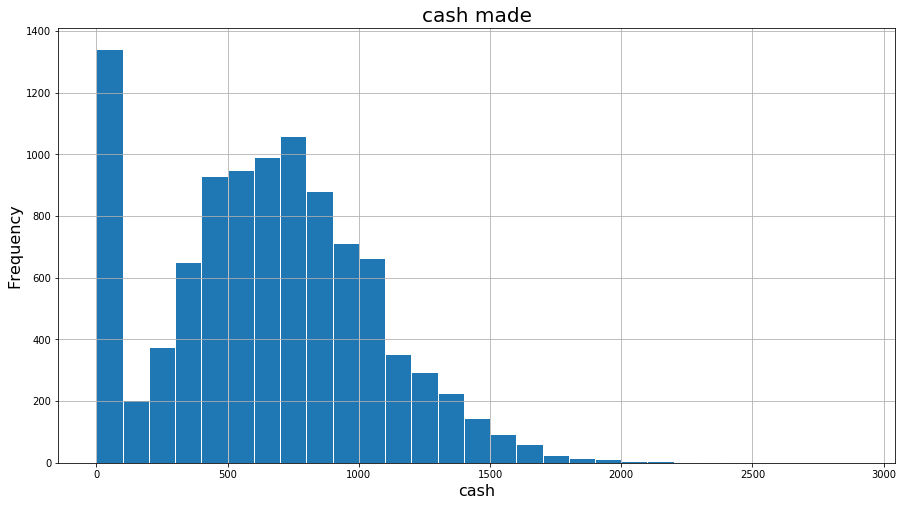

In [11]:
#Frequency histogram
my_bins = range(0,3000,100)
df = pd.DataFrame({'Cash' : p})
fig,ax = plt.subplots(nrows=1, ncols=1, figsize=(15,8))
df.hist(ax=ax, bins = my_bins,edgecolor = "white")

ax.set_title("cash made", fontsize=20)

# Add axis labels 
ax.set_xlabel("cash", fontsize=16)
ax.set_ylabel("Frequency", fontsize=16)


**Part C**: Use your code from **Part A** to estimate the probability that a player goes bankrupt in a game that only lasts 25 turns.

In [228]:
#Estimation of probability of going bankrupt
# using the array that I have made from my code 
zeros = 0
for i in p:
    if i == 0:
        zeros += 1
print(zeros/len(p))

0.1227


**Part D**: Use your code from **Part A** to estimate the probability that a player goes bankrupt in a 25 turn game  _given_ that they went to **Jail** at least twice.  Is a player more or less likely to go bankrupt if they've been to **Jail** twice?  

from my function, a player is more *% more likely to go bankrupt if they've been to jail at least twice

In [233]:
#Estimate probability of going bankrupt given jail at least twice.
def jtTwentyFiveTurns():
    cash = 200
    state = 0
    inJail = False
    visitedJail = False
    visitedJailTwice = False
    for i in range(25):
        state, cash = miniopoly_turn(state, cash)
        if state == 30:
            if inJail == False: #entering into jail
#                 print("entering into Jail first time")
                inJail = True
                if visitedJail == False: #First time Visiting
                    visitedJail = True
                else: #already visited 
                    visitedJailTwice = True
#                     print("SECOND TIME")
        elif inJail == True: #out of Jail"
                inJail = False
                    
                        
                        
        if cash == 0: return cash, visitedJailTwice
    return cash, visitedJailTwice

jtSample = np.array([])

for i in range(10000): #cash, went to jail
    turns = jtTwentyFiveTurns()
    if turns[1] == True: #went to jail twice 
        print(turns)
        jtSample = np.append(jtSample,turns[0])
jtSample

bankr = 0 
for i in jtSample:
    if i == 0:
        bankr += 1

bankr/len(jtSample)

(600, True)
(175, True)
(0, True)
(675, True)
(625, True)
(550, True)
(100, True)
(600, True)
(50, True)
(0, True)
(375, True)
(300, True)
(350, True)
(125, True)
(375, True)
(400, True)
(575, True)
(0, True)
(850, True)
(0, True)
(0, True)
(375, True)
(325, True)
(500, True)
(400, True)
(175, True)
(300, True)
(0, True)
(325, True)
(0, True)
(750, True)
(450, True)
(900, True)
(100, True)
(75, True)
(425, True)
(425, True)
(300, True)
(0, True)
(800, True)
(325, True)
(150, True)
(775, True)
(175, True)
(525, True)
(700, True)
(0, True)
(650, True)
(0, True)
(225, True)
(625, True)
(275, True)
(325, True)
(875, True)
(0, True)
(150, True)
(300, True)
(200, True)
(0, True)
(725, True)
(650, True)
(950, True)
(0, True)
(675, True)
(725, True)
(850, True)
(150, True)
(675, True)
(425, True)
(325, True)
(0, True)
(450, True)
(625, True)
(450, True)
(275, True)
(450, True)
(375, True)
(925, True)
(250, True)
(500, True)
(0, True)
(175, True)
(0, True)
(475, True)
(1125, True)
(0, True)
(30

0.18030513176144244

**Part E**: Use your code from **Part A** to estimate the probability (either directly or using Bayes' Rule) that a player has gone to jail at least twice, given that the player went bankrupt in the first 25 turns.

In [240]:
#Estimate probability of going to jail twice, given bankruptcy in first 25 turns.
rpSample = np.array([])
for i in range(10000): #cash, went to jail
    turns = jtTwentyFiveTurns()
    if turns[0] == 0: #bankrupt
        rpSample = np.append(rpSample,turns[1])
rpSample

sum(rpSample)/len(rpSample)


0.11341059602649006

***
<a id='p5'></a>
[Back to top](#top)

### [15 points] Problem 5

To get published in an academic journal, you have to prove something "interesting."  As a result, most academics begin their research by investigating hypotheses that, all else equal, are unlikely to be true.  Suppose each research project begins with a research *claim* that has a 10% chance of being correct.

They then perform a study that satisfies the following two properties:

    1) The probability that they correctly *find* an important result given that their *claim* is true is 50%
    2) The probability that they incorrectly *find* an important result given that their *claim* is false is 5%

If they *find* an important result they are published.  What is the probability that their *claim* was true, given that they were published?

P(P) being published

P(T) true

P(F) False

$P(T \mid P) = \frac{P(T \cap P)}{P(P)}$

Bays
$P(T \mid P) = \frac{P(P\mid T) P(T)}{P(P)}$

total probability

$P(P \mid T)P(T) + P(P \mid F)P(F)$


$P(T \mid P) = \frac{0.5*0.1}{0.5*0.1+0.05*0.9} = 0.5263$